In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bostonhoustingmlnd/housing.csv


In [4]:
#https://towardsdatascience.com/multiple-linear-regression-model-using-python-machine-learning-d00c78f1172a
#https://medium.com/analytics-vidhya/multiple-linear-regression-with-python-98f4a7f1c26c
#RM: average number of rooms per dwelling
#LSTAT: percentage of population considered lower status
#PTRATIO: pupil-teacher ratio by town
#Target Variable 4. MEDV: median value of owner-occupied homes

In [5]:
import seaborn as sns
import plotly
%matplotlib inline
#import plotly.plotly as py
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [6]:
path="../input/bostonhoustingmlnd/housing.csv"

In [7]:

data = pd.read_csv(path)
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [8]:
data.shape

(489, 4)

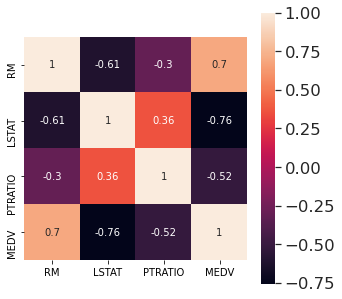

In [9]:
#finding correlations
import seaborn as sns
fig = plt.subplots(figsize = (5,5))
sns.set(font_scale=1.5)
sns.heatmap(data.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [10]:
data.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

In [21]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


(489, 4)

In [22]:
input_feature= data.iloc[:,1:4].values
input_data = input_feature
input_feature

array([[4.980e+00, 1.530e+01, 5.040e+05],
       [9.140e+00, 1.780e+01, 4.536e+05],
       [4.030e+00, 1.780e+01, 7.287e+05],
       ...,
       [5.640e+00, 2.100e+01, 5.019e+05],
       [6.480e+00, 2.100e+01, 4.620e+05],
       [7.880e+00, 2.100e+01, 2.499e+05]])

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:3] = sc.fit_transform(input_feature[:,:])

In [24]:
lookback= 50
test_size=int(.5 * len(data))
X=[]
y=[]
for i in range(len(data)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,1])

In [26]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, 3)
X_test = X_test.reshape(X_test.shape[0],lookback, 3)
print(X.shape)
print(X_test.shape)

(438, 50, 3)
(294, 50, 3)


In [27]:
X.shape

(438, 50, 3)

In [29]:
from keras import Sequential
from keras.layers import Dense, LSTM

In [33]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],3)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 30)            4080      
_________________________________________________________________
lstm_4 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_5 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 18,751
Trainable params: 18,751
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=200, batch_size=32)

Epoch 1/200
14/14 [==============================] - 6s 65ms/step - loss: 0.0959
Epoch 2/200
14/14 [==============================] - 1s 64ms/step - loss: 0.0465
Epoch 3/200
14/14 [==============================] - 1s 64ms/step - loss: 0.0359
Epoch 4/200
14/14 [==============================] - 1s 65ms/step - loss: 0.0402
Epoch 5/200
14/14 [==============================] - 1s 64ms/step - loss: 0.0366
Epoch 6/200
14/14 [==============================] - 1s 69ms/step - loss: 0.0270
Epoch 7/200
14/14 [==============================] - 1s 65ms/step - loss: 0.0348
Epoch 8/200
14/14 [==============================] - 1s 64ms/step - loss: 0.0304
Epoch 9/200
14/14 [==============================] - 1s 65ms/step - loss: 0.0291
Epoch 10/200
14/14 [==============================] - 1s 63ms/step - loss: 0.0291
Epoch 11/200
14/14 [==============================] - 1s 63ms/step - loss: 0.0311
Epoch 12/200
14/14 [==============================] - 1s 62ms/step - loss: 0.0301
Epoch 13/200
14/14 [=====

14/14 [==============================] - 1s 68ms/step - loss: 0.0069
Epoch 102/200
14/14 [==============================] - 1s 65ms/step - loss: 0.0092
Epoch 103/200
14/14 [==============================] - 1s 65ms/step - loss: 0.0065
Epoch 104/200
14/14 [==============================] - 1s 66ms/step - loss: 0.0065
Epoch 105/200
14/14 [==============================] - 1s 64ms/step - loss: 0.0067
Epoch 106/200
14/14 [==============================] - 1s 63ms/step - loss: 0.0082
Epoch 107/200
14/14 [==============================] - 1s 63ms/step - loss: 0.0072
Epoch 108/200
14/14 [==============================] - 1s 63ms/step - loss: 0.0086
Epoch 109/200
14/14 [==============================] - 1s 62ms/step - loss: 0.0080
Epoch 110/200
14/14 [==============================] - 1s 64ms/step - loss: 0.0090
Epoch 111/200
14/14 [==============================] - 1s 64ms/step - loss: 0.0078
Epoch 112/200
14/14 [==============================] - 1s 64ms/step - loss: 0.0081
Epoch 113/200
14/1

14/14 [==============================] - 1s 63ms/step - loss: 0.0060
Epoch 200/200
14/14 [==============================] - 1s 66ms/step - loss: 0.0049


In [35]:
predicted_value= model.predict(X_test)

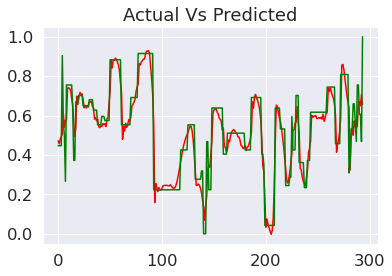

In [36]:
plt.plot(predicted_value, color= 'red')
plt.plot(input_data[lookback:test_size+(2*lookback),1], color='green')
plt.title("Actual Vs Predicted")

plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
R2_score = r2_score(input_data[lookback:test_size+(2*lookback),1], predicted_value)
rmsd = np.sqrt(mean_squared_error(input_data[lookback:test_size+(2*lookback),1], predicted_value))  

print("Root Mean Square Error \n", rmsd)
print("R^2 Score: \n", R2_score)

Root Mean Square Error 
 0.0840393815969122
R^2 Score: 
 0.8577371105901184
